<font size="5">Libraries/Installations</font>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

<font size="5">Preprocessing</font>

In [4]:
df1 = pd.read_csv("/Users/Rudu/Downloads/Bengaluru_House_Data.csv") #display the different types of preoperties
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df1.shape

(13320, 9)

In [8]:
df1.groupby('area_type')['area_type'].agg('count') # get the counts for each property's area type

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [15]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns') #remove unwanted features
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [17]:
df2.isnull().sum() #finds null values

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [21]:
df3 = df2.dropna() #drop null values
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [23]:
df3.shape # new shape

(13246, 5)

In [25]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


<font size="3">The sizes are all in different units, so we should try to standardize these units by quantifying the # of bedrooms as a bhk column</font>

In [134]:
#take the preceding token as number of bedrooms and turn into a bhk column
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0])) 
df3.bhk.unique()

/var/folders/my/4p_6dy0d24x_qkk7ccz2_v2h0000gp/T/ipykernel_9298/2984971606.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [36]:
# function to determine whether input is a float or not:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [75]:
# Filter and display the first 10 rows where 'total_sqft' is not a float (likely contains non-numeric or irregular values)
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


<font size="3">We can see that some of these total_sqft values are ranges or have letters in their values

<font size="3">For those that are ranges, we can attemmpt to average them out into a desired value:</font>

In [63]:
def convert_sqft_to_num(x):
    # Check if 'x' is a range (e.g., "1200-1500")
    tokens = x.split('-')
    if len(tokens) == 2:
        # If it's a range, return the average of the two values
        return (float(tokens[0]) + float(tokens[1])) / 2
    
    try:
        # Try converting 'x' directly to a float
        return float(x)
    except:
        # If conversion fails (e.g., non-numeric value), return None
        return None

In [168]:
df4 = df3.copy()

# Apply the convert_sqft_to_num function to the 'total_sqft' column to standardize square footage units
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)

# Remove rows where 'total_sqft' could not be converted to a number (i.e., where it has letters in their value)
df4 = df4[df4.total_sqft.notnull()]
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [110]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft'] # create a new column to monitor price per sqft
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [112]:
len(df5.location.unique())

1298

In [114]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [20]:
df5.to_csv("bhp.csv",index=False)

In [116]:
df5.location = df5.location.apply(lambda x: x.strip()) #gets number of data points of each location
location_stats = df5['location'].value_counts(ascending=False)
location_stats

location
Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

In [22]:
location_stats.values.sum()

13200

In [23]:
len(location_stats[location_stats>10])

240

In [24]:
len(location_stats[location_stats<=10])

1047

<font size="3">There are 1047 locations with less than 10 entries, let's classify them together as an "other" group:</font>

In [120]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: count, Length: 1047, dtype: int64

In [129]:
#classifies the locations with less than or equal to 10 data points as an "other" group:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

241

In [131]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


<font size="5">Data Cleaning</font>

In [154]:
df5.shape

(13200, 7)

In [150]:
# Filter and display rows where the average area per bedroom (total_sqft / bhk) is less than 300 sqft, 
# likely indicating data anomalies or unusually small rooms
df5[df5.total_sqft/df5.bhk<300].head() 

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [152]:
# Let's remove these rows as they may not be representative of our entire data
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12456, 7)

In [158]:
df6.price_per_sqft.describe() # Get the statistics on the price_per_sqft variable

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

<font size="3">Here we find that the min price per sqft is 267 rupees/sqft, whereas the max is much higher(176,470 rupees/sqft), which indicates a large variation in property prices. 

<font size="3">We should remove the data in each location that are more than a standard deviation above or below from the mean.</font>

In [172]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    
    # Group the DataFrame by 'location' and process each group separately
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)  # Calculate the mean and standard deviation
        st = np.std(subdf.price_per_sqft)  
        
        # Filter out data points that fall outside one standard deviation from the mean
        reduced_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]
        
        # Concatenate the filtered data back into the output DataFrame
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    
    return df_out

# Apply the function to remove outliers from df6 and store the result in df7
df7 = remove_pps_outliers(df6)

df7.shape

(10242, 7)

In [174]:
df7.price_per_sqft.describe()

count    10242.000000
mean      5657.735993
std       2266.368844
min       1250.000000
25%       4244.796706
50%       5172.846776
75%       6426.000592
max      24509.803922
Name: price_per_sqft, dtype: float64

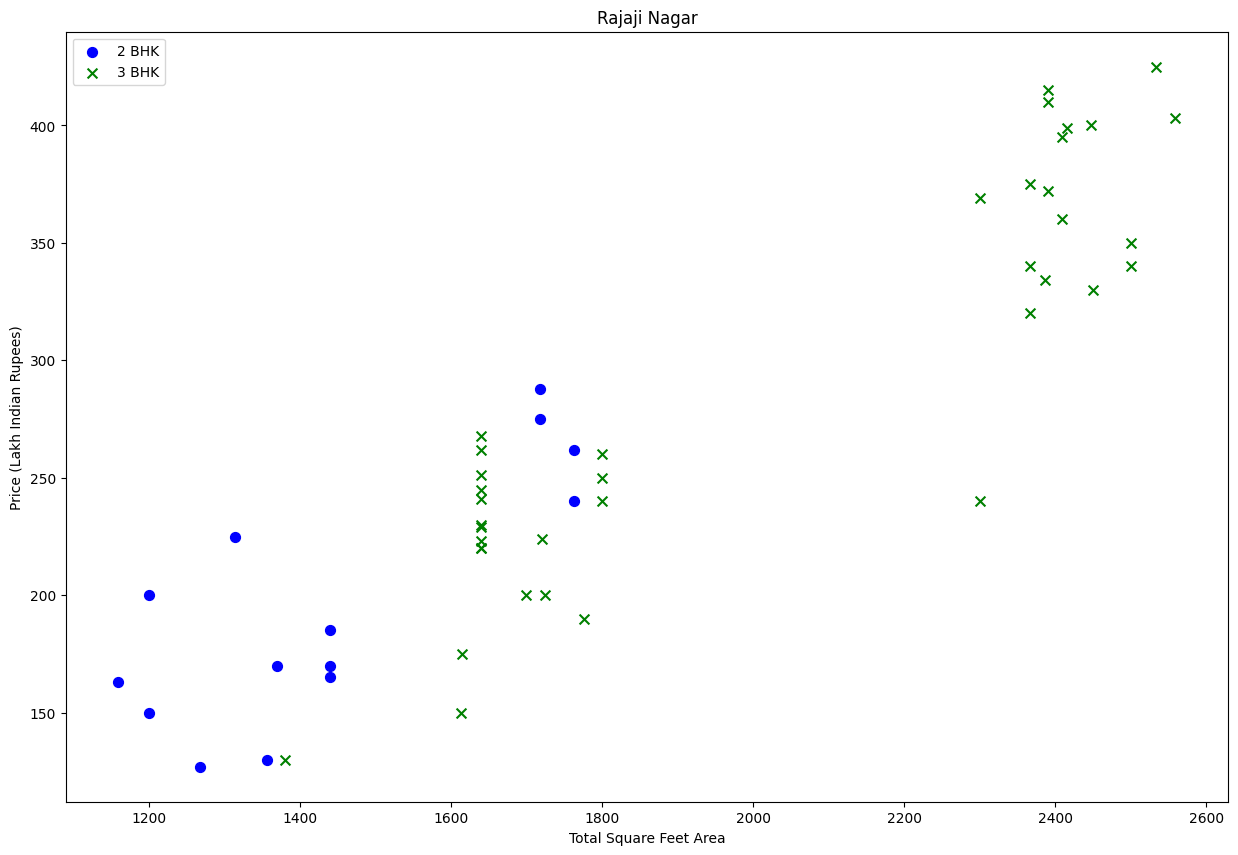

In [179]:
def plot_scatter_chart(df, location):
    """
    This function generates a scatter plot to visualize the relationship between total square footage 
    and price for 2 BHK and 3 BHK properties within a specified location.

    Parameters:
    - df: The DataFrame containing real estate data, including columns for location, BHK, total_sqft, and price.
    - location: The specific location within which to filter and plot the data.
    """
    
    # Filter the DataFrame for 2 BHK and 3 BHK properties in the specified location
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    
    # Plot scatter points for 2 BHK properties in blue
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    
    # Plot scatter points for 3 BHK properties in green with a different marker
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='x', color='green', label='3 BHK', s=50)
    
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    
    plt.title(location)
    
    plt.legend()

# Example usage: Visualize the property price distribution in "Rajaji Nagar"
plot_scatter_chart(df7, "Rajaji Nagar")


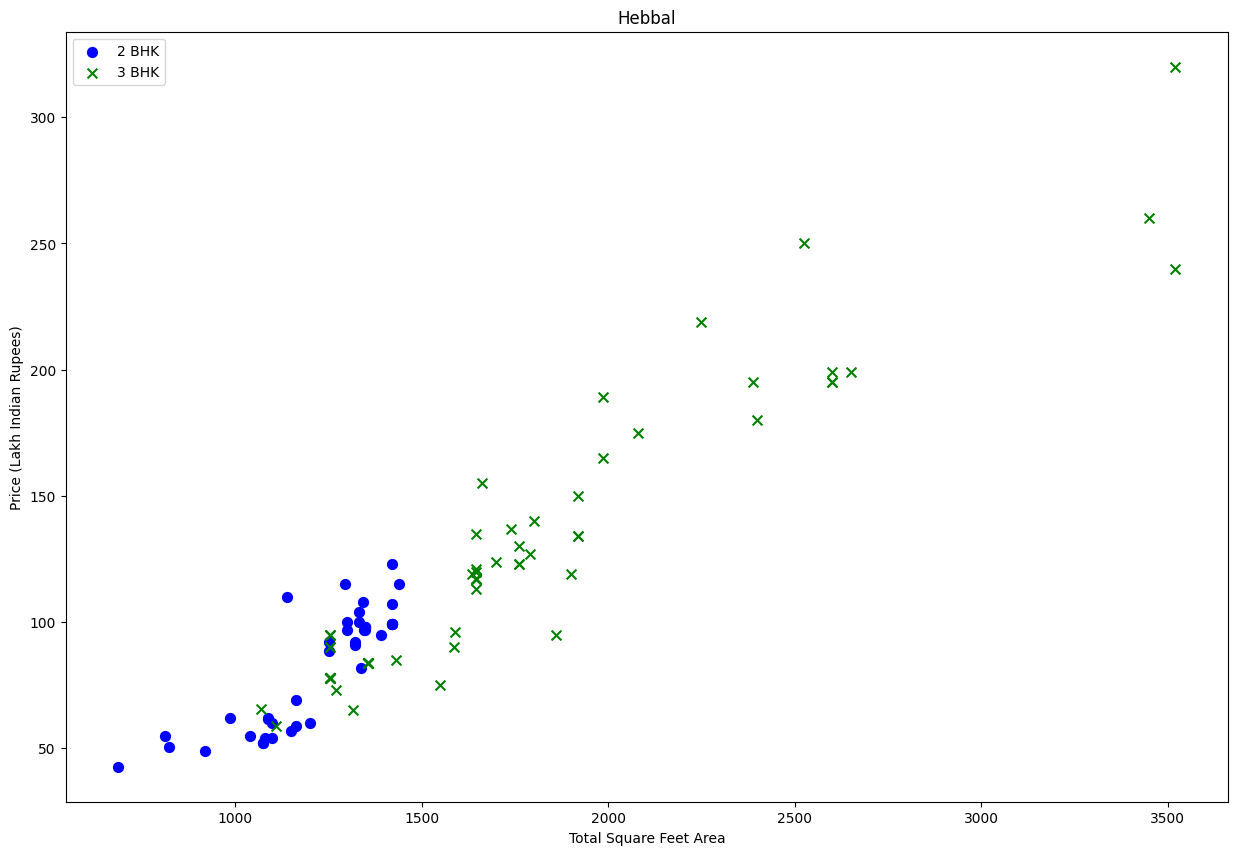

In [181]:
plot_scatter_chart(df7,"Hebbal")

<font size="3">We should also remove properties where, in the same location, a 3-bedroom apartment is priced lower than a 2-bedroom apartment with the same square footage, as it could skew the results. 

<font size="3">To do this, we will create a dictionary of statistics for each BHK type within a location, like this:

<font size="3">{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },...etc    }</font>

In [191]:
def remove_bhk_outliers(df):
    """
    This function removes outlier properties where, in the same location, a higher BHK apartment (e.g., 3 BHK)
    is priced lower per square foot than a lower BHK apartment (e.g., 2 BHK). It helps ensure that the data
    reflects realistic pricing patterns, removing cases that might skew the analysis.

    Parameters:
    - df: A pandas DataFrame containing real estate data with columns for location, bhk, and price_per_sqft.

    Returns:
    - A DataFrame with the outliers removed based on the criteria described above.
    """
    
    # Initialize an empty array to store indices of rows that need to be excluded (i.e., outliers)
    exclude_indices = np.array([])
    
    # Group the DataFrame by 'location' to handle each location separately
    for location, location_df in df.groupby('location'):
        
        # Initialize a dictionary to store statistics (mean, std, count) for each BHK type in the current location
        bhk_stats = {}
        
        # Calculate and store the statistics for each BHK type within the location
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),  # Mean price per square foot for the BHK type
                'std': np.std(bhk_df.price_per_sqft),    # Standard deviation of price per square foot
                'count': bhk_df.shape[0]                 # Number of properties for this BHK type
            }
        
        # Iterate again over each BHK type in the location to find and mark outliers
        for bhk, bhk_df in location_df.groupby('bhk'):
            
            # Get the stats for the previous BHK type (e.g., for 3 BHK, we look at 2 BHK)
            stats = bhk_stats.get(bhk - 1)
            
            # If stats for the previous BHK type exist and there are more than 5 properties in that group
            if stats and stats['count'] > 5:
                
                # Identify the properties where the price per square foot is lower than the mean of the lower BHK type
                exclude_indices = np.append(exclude_indices, 
                                            bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    
    # Remove the identified outlier rows from the DataFrame
    return df.drop(exclude_indices, axis='index')

# Apply the function to remove BHK outliers from df7 and store the result in df8
df8 = remove_bhk_outliers(df7)

df8.shape

(7317, 7)

<font size="3">Now let's check the new points of the locations we visualized before:</font>

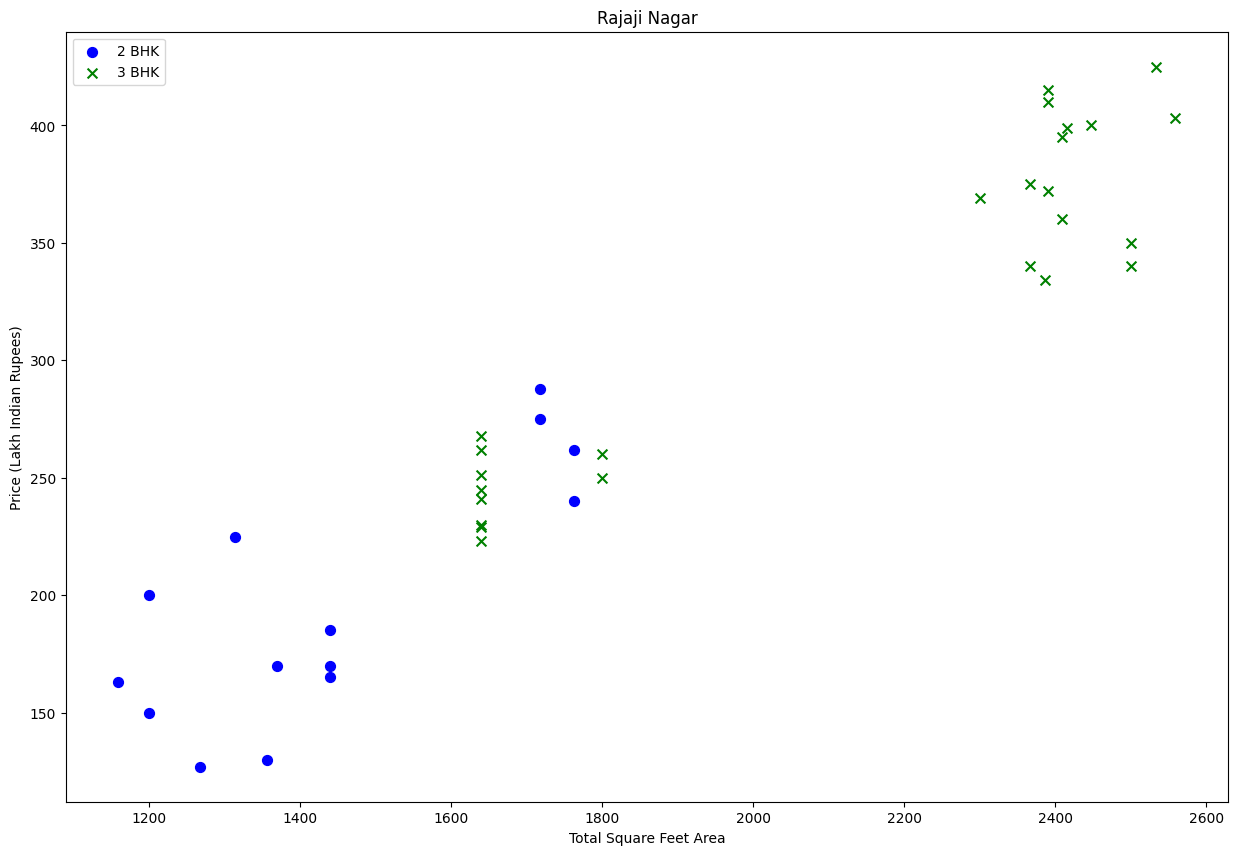

In [196]:
plot_scatter_chart(df8,"Rajaji Nagar")

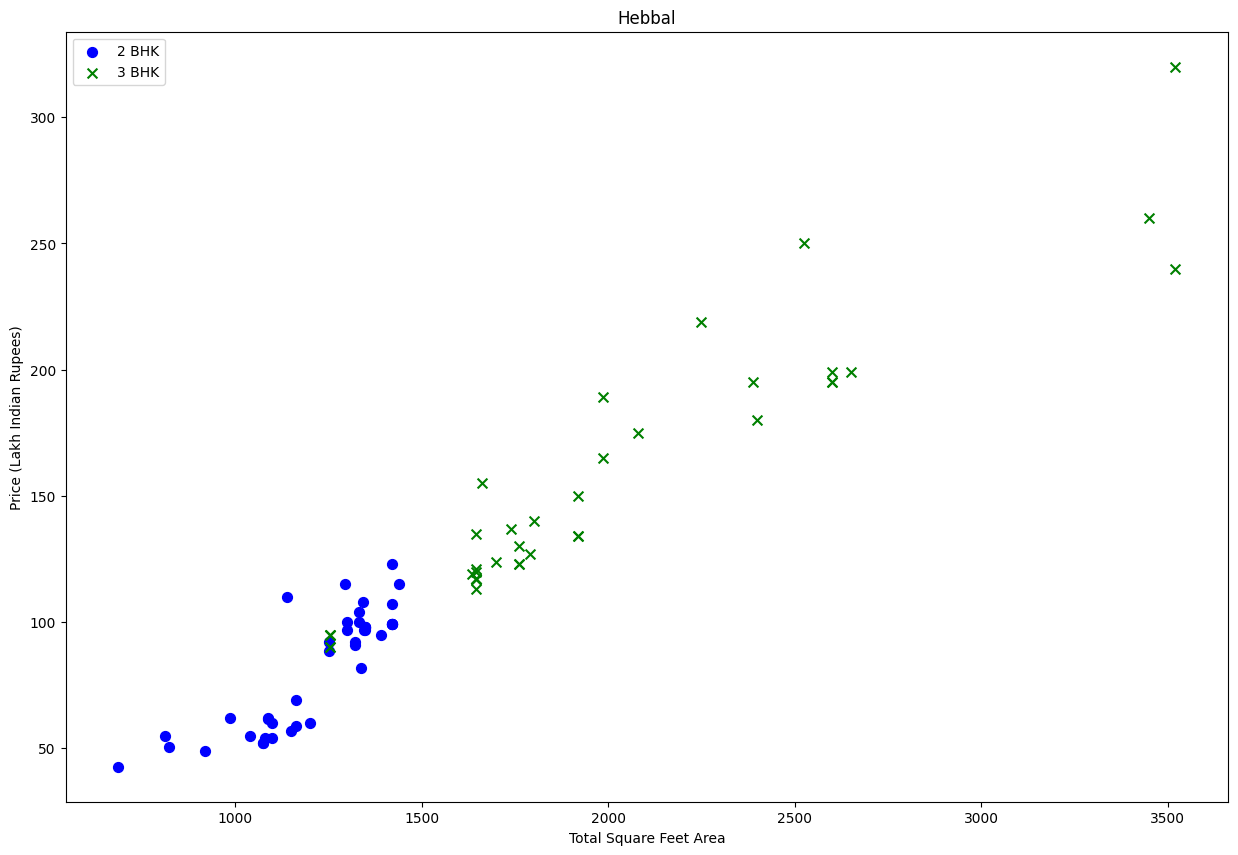

In [198]:
plot_scatter_chart(df8,"Hebbal")

<font size="3">Much better!</font>

Text(0, 0.5, 'Count')

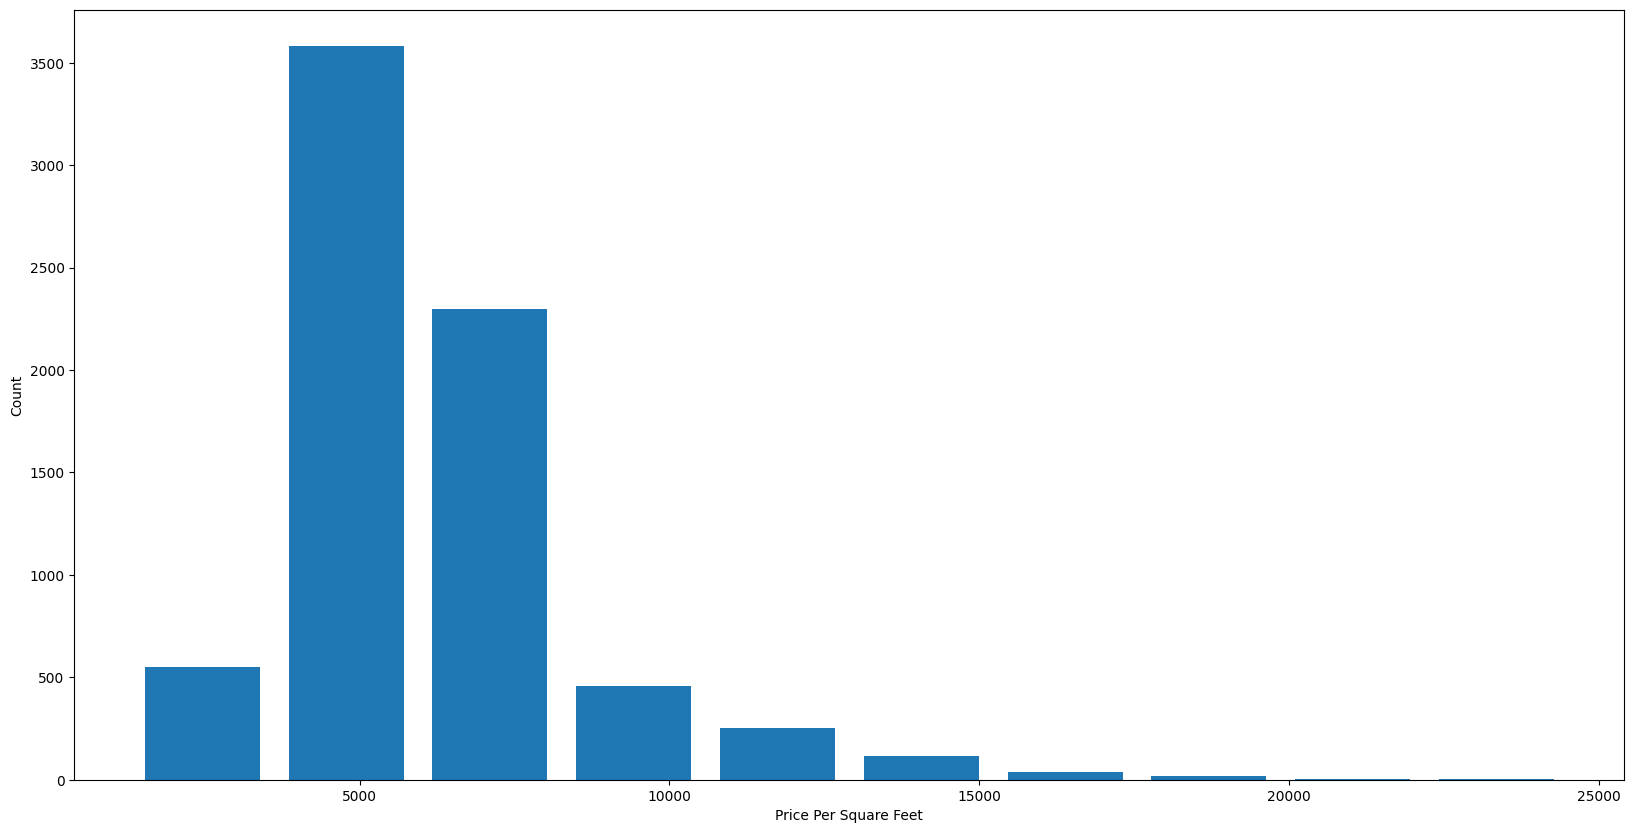

In [202]:
# Create a histogram to visualize the distribution of price per square foot
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [204]:
# Display the unique values in the 'bath' column of the DataFrame
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

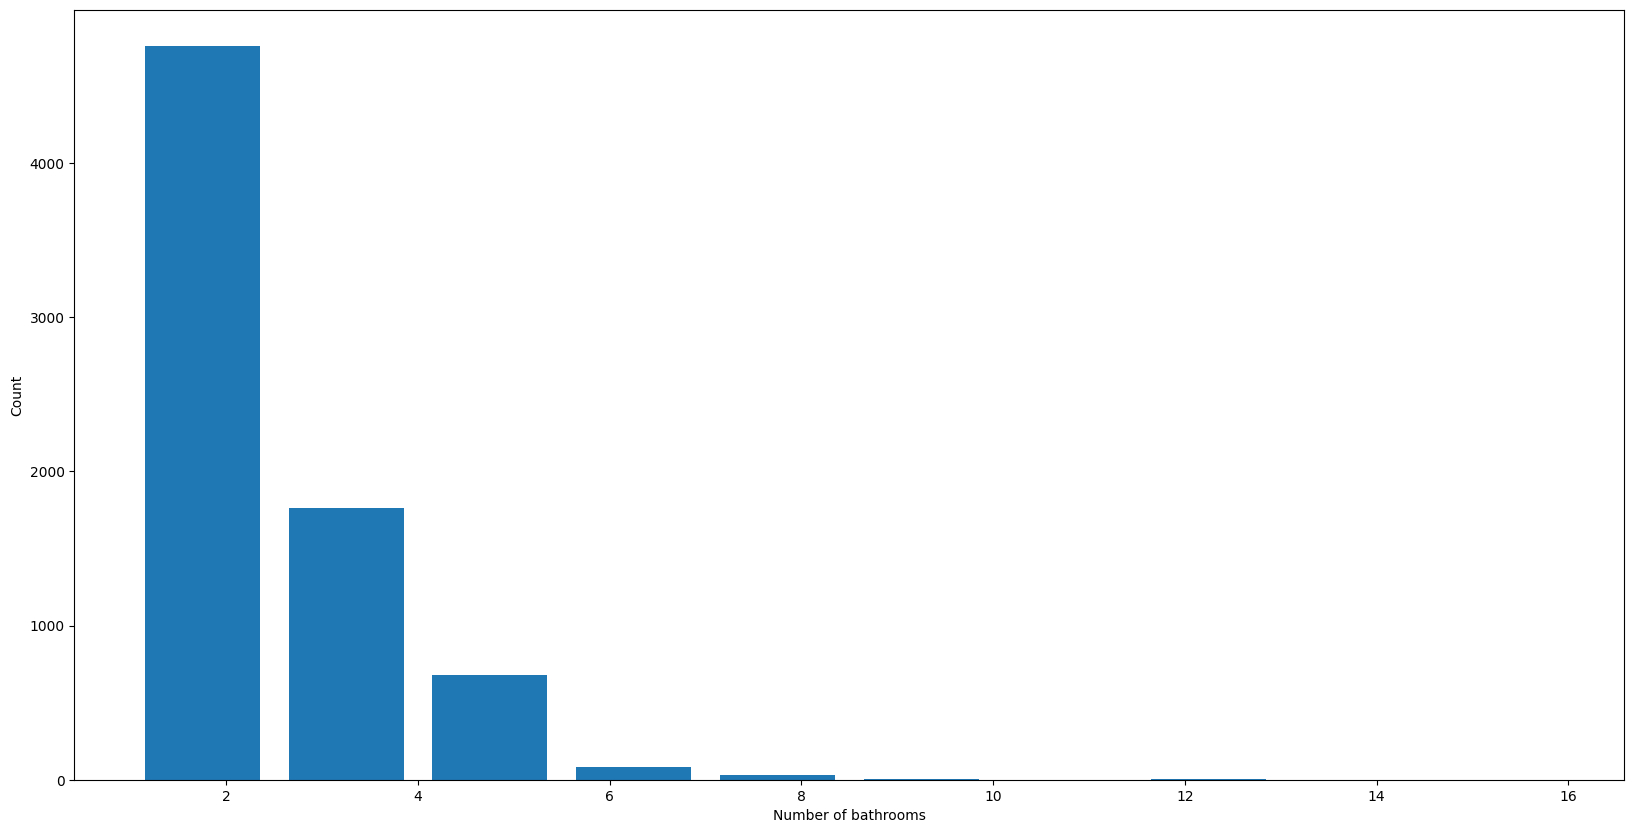

In [208]:
# Create a histogram to visualize the distribution of the number of bathrooms in the properties
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [228]:
df8.shape

(7317, 7)

In [216]:
df8[df8.bath>10] #properties with more than 10 bathrooms

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


<font size="3">It is unusual to have 2 more bathrooms than the number of bedrooms in a home, so we'll remove properties where that feature applies:</font>

In [226]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [232]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7239, 7)

In [248]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns') # we likely do not need these features now
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


<font size="5">Data Manipulation</font>

In [252]:
# Create dummy variables for the 'location' column to convert categorical data into numeric format
dummies = pd.get_dummies(df10.location)
dummies.head(10)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [256]:
#remove the 'other' column as it's a catch-all category that can lead to multicollinearity
df11 = pd.concat([df10, dummies.drop('other', axis='columns')], axis = 'columns')
df11.head(10)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1st Block Jayanagar,2750.0,4.0,413.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,1st Block Jayanagar,2450.0,4.0,368.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,1st Phase JP Nagar,1875.0,3.0,167.0,3,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,1st Phase JP Nagar,1500.0,5.0,85.0,5,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,1st Phase JP Nagar,2065.0,4.0,210.0,3,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [260]:
# The 'location' column was replaced by the dummy variables, which now represent the location information numerically.
df12 = df11.drop('location',axis='columns')
df12.head(10)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,2750.0,4.0,413.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,2450.0,4.0,368.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,1875.0,3.0,167.0,3,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,1500.0,5.0,85.0,5,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,2065.0,4.0,210.0,3,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<font size="5">Model Training</font>

In [264]:
# The 'price' column is the target variable we want to predict(y), so we exclude it from X,
# which will contain only the feature columns used for model training.
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [267]:
y = df12.price #extract prices
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [269]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10) #20% test, 80% training sample

In [271]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression() # linear regression model
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8629132245229443

<font size="3">86% is pretty decent, can we do better though?

<font size="3">Let's try a K Fold cross validation test to measure accuracy of our LinearRegression model</font>

In [277]:
from sklearn.model_selection import ShuffleSplit  # randomizes sample so each fold has an equal distribution
from sklearn.model_selection import cross_val_score  # evaluates the model using cross-validation

# Create a ShuffleSplit object to generate random train-test splits.
# n_splits=5 specifies that we want 5 different splits.
# random_state=0 ensures reproducibility of the splits.

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

# The model will be trained and tested 5 times, with each iteration using a different split of the data.
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

<font size="3">We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test a few other algorithms for regression to see if we can get an even better score.

<font size="3">We can use GridSearch to try out different models with different parameters:</font> 


In [289]:
from sklearn.model_selection import GridSearchCV  # GridSearchCV for hyperparameter tuning
from sklearn.linear_model import LinearRegression, Lasso  # LinearRegression and Lasso models
from sklearn.tree import DecisionTreeRegressor  # DecisionTreeRegressor model

def find_best_model_using_gridsearchcv(X, y):
    # Define a dictionary of models and their hyperparameter grids for tuning
    algos = {
        'linear_regression': {
            'model': LinearRegression(),  # Linear Regression model with no hyperparameters
            'params': {}  # No hyperparameters to tune
        },
        'lasso': {
            'model': Lasso(),  # Lasso model for regularization
            'params': {
                'alpha': [1, 2],  # Regularization strength
                'selection': ['random', 'cyclic']  # Method for selecting features
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),  # Decision Tree model for regression
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],  # Criterion for splitting nodes
                'splitter': ['best', 'random']  # Strategy for selecting split points
            }
        }
    }
    
    scores = []  # List to store results for each model
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)  # 5-fold cross-validation
    
    for algo_name, config in algos.items():
        # Initialize GridSearchCV for the current model and hyperparameter grid
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)  # Fit the model and search for the best parameters
        scores.append({
            'model': algo_name,  # Model name
            'best_score': gs.best_score_,  # Best cross-validation score
            'best_params': gs.best_params_  # Best hyperparameters found
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X, y)

,model,best_score,best_params
0,linear_regression,0.847796,{}
1,lasso,0.726779,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.722333,"{'criterion': 'squared_error', 'splitter': 'ra..."


<font size="3">So, linear regression seems to be the best model</font> 


<font size="5">Price Predictor Regression Model</font> 

In [68]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [69]:
np.where(X.columns=='2nd Phase Judicial Layout')[0][0]

5

In [299]:
def predict_price(location, sqft, bath, bhk):    
    """
    Predicts the price of a property given its location, square footage, number of bathrooms, and number of bedrooms.
    
    Parameters:
    - location (str): The location of the property.
    - sqft (float): The square footage of the property.
    - bath (int): The number of bathrooms in the property.
    - bhk (int): The number of bedrooms (BHK) in the property.
    
    Returns:
    - float: The predicted price of the property in lakhs.
    """
    # Find the index of the location in the feature columns
    loc_index = np.where(X.columns == location)[0][0]
    
    # Initialize a feature vector with zeros
    x = np.zeros(len(X.columns))
    
    # Set the feature values
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    
    # Set the location feature to 1 if the location is present in the columns
    if loc_index >= 0:
        x[loc_index] = 1
    
    # Predict the price using the trained linear regression model and return it
    return lr_clf.predict([x])[0]


In [301]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

/Users/Rudu/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.86570258312327

In [303]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

/Users/Rudu/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.0806228498708

In [305]:
predict_price('Indira Nagar',1000, 2, 2) # different location, same bedroom/bath

/Users/Rudu/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


193.31197733179937

In [307]:
predict_price('Indira Nagar',1000, 3, 3)

/Users/Rudu/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


195.5268975985469

<font size="3">We can see that the property value in Indira Nagar seems to be much larger than that of 1st Phase JP Nagar</font> 

<font size="5">Save the trained model</font> 

In [82]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

<font size="3">Export our location and column information to a file that will be useful in creating our prediction application</font> 

In [83]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))